##### a. Import the necessary packages

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras.datasets import fashion_mnist

##### b. Load the training and testing data (MNIST/CIFAR10)

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
img = x_train[1]

In [7]:
img

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

In [8]:
import matplotlib.pyplot as plt

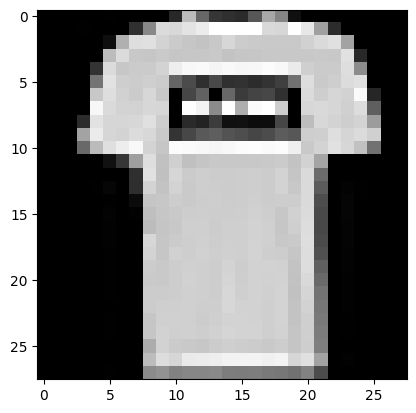

In [9]:
plt.imshow(img, cmap='gray');

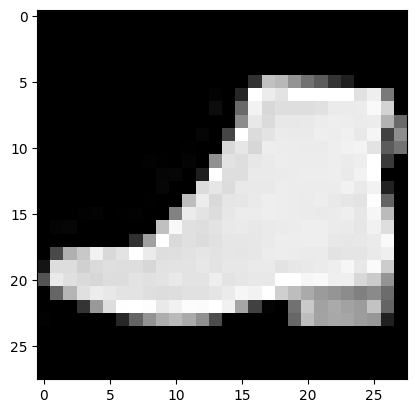

In [10]:
img = x_train[7000]
plt.imshow(img, cmap='gray');

In [11]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [12]:
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
          'Sandal','Shirt','Sneaker','Bag','Ankle boot']

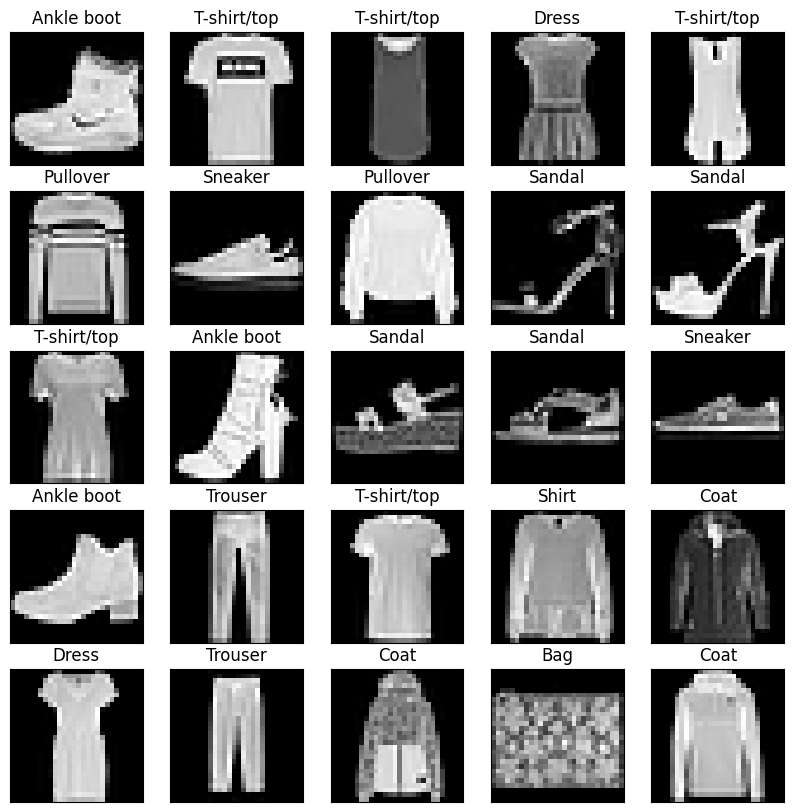

In [13]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(labels[y_train[i]])
    plt.imshow(x_train[i], cmap = 'gray')

In [14]:
import pandas as pd
pd.Series(y_train).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
Name: count, dtype: int64

In [15]:
# one hot encoding of output variable
from keras.utils import to_categorical
y_train_new = to_categorical(y_train)
y_test_new = to_categorical(y_test)

In [16]:
y_train_new.shape

(60000, 10)

In [17]:
y_train_new

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
import numpy as np

In [19]:
arr = np.array([[6,7,8],[8,4,2],[0,1,2]])
arr

array([[6, 7, 8],
       [8, 4, 2],
       [0, 1, 2]])

In [20]:
arr.flatten()

array([6, 7, 8, 8, 4, 2, 0, 1, 2])

##### c. Define the network architecture using Keras

In [21]:
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPool2D

In [22]:
# Create the object of neural network
model = Sequential()

# Add the input layer
model.add(Input((28,28,1)))

# Add convolutional layer - 1
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))

# Pooling layer - 1
model.add(MaxPool2D(pool_size=(2,2)))

# Add convolutional layer - 2
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu'))

# Pooling layer - 2
model.add(MaxPool2D(pool_size=(2,2)))

# Add flatten layer
model.add(Flatten())

# Add Hidden layer
model.add(Dense(128, activation='relu'))

# Add output layer
model.add(Dense(10, activation='softmax'))

2025-09-30 12:41:23.502596: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        51,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,562 (224.85 KB)

 Trainable params: 57,562 (224.85 KB)

 Non-trainable params: 0 (0.00 B)

##### d. Train the model using SGD

In [24]:
from keras.optimizers import SGD

In [25]:
model.compile(loss = 'categorical_crossentropy', optimizer=SGD(),
             metrics=['accuracy'])

In [26]:
history = model.fit(x_train, y_train_new, epochs=10, batch_size=10)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 34s 6ms/step - accuracy: 0.4927 - loss: 5.0199
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step - accuracy: 0.7302 - loss: 0.6814
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 0.7680 - loss: 0.5772
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - accuracy: 0.7826 - loss: 0.5456
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - accuracy: 0.7949 - loss: 0.5220
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step - accuracy: 0.7998 - loss: 0.4986
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - accuracy: 0.8052 - loss: 0.4892
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 33s 6ms/step - accuracy: 0.8047 - loss: 0.4873
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 0.8077 - loss: 0.4847
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 34s 6ms/step - accuracy: 0.7665 - loss: 0.5877


##### e. Evaluate the network

In [28]:
model.evaluate(x_test, y_test_new, batch_size=1)

10000/10000 ━━━━━━━━━━━━━━━━━━━━ 27s 3ms/step - accuracy: 0.7898 - loss: 0.5460


[0.545167863368988, 0.7861999869346619]

In [30]:
history.history

{'accuracy': [0.6317166686058044,
  0.7476333379745483,
  0.7730000019073486,
  0.7870333194732666,
  0.7957666516304016,
  0.7994833588600159,
  0.8040666580200195,
  0.8076000213623047,
  0.7920500040054321,
  0.7764833569526672],
 'loss': [1.4655671119689941,
  0.6407762169837952,
  0.5695692300796509,
  0.5354852676391602,
  0.5162343978881836,
  0.5009831190109253,
  0.49214333295822144,
  0.4831663966178894,
  0.5302678346633911,
  0.5582649111747742]}

##### f. Plot the training loss and accuracy

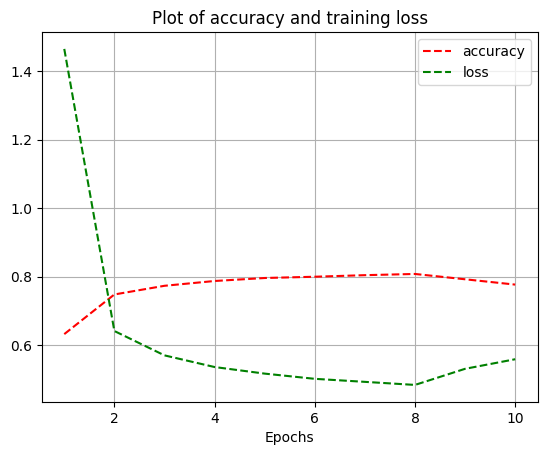

In [40]:
plt.title('Plot of accuracy and training loss')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history.history['accuracy'], 
         color = 'r', label = 'accuracy', ls = "--")
plt.plot(range(1,11), history.history['loss'], ls = "--",
         color = 'g', label = 'loss')
plt.legend()